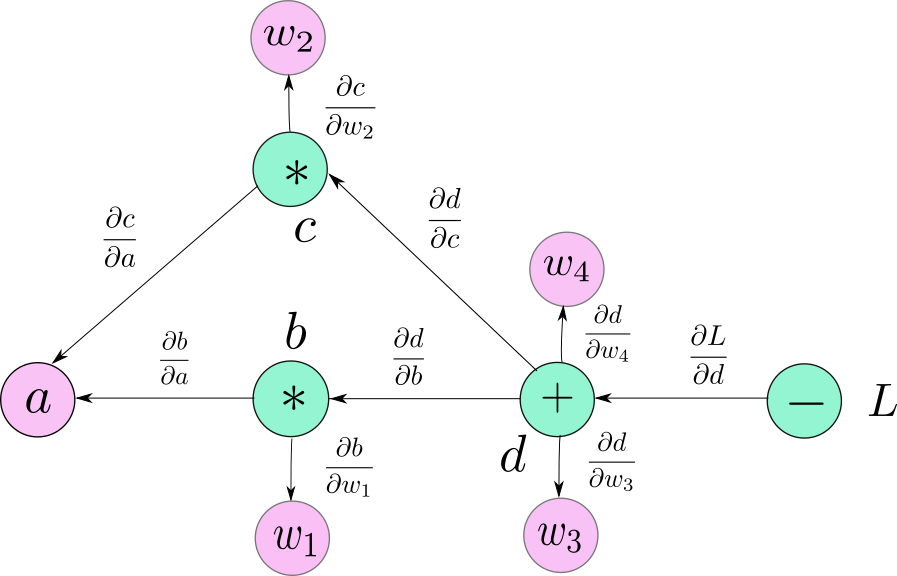

Why it got so popular?
To solve deep neural networks, we need to calculate derivates, and to do this computationally, deep learning frameworks use what are called computational graphs.


PyTorch introduced Dynamic Computational Graphs, a first in the industry. It means that the graph is generated on the fly as the operations occur in contrast to static graphs that are fully determined before actual action occur.

Experimentation, advanced models and quick tests need Dynamic Computation Graphs as a back-end feature.

Numpy is the go-to package for nD arrays. PyTorch's tensor library mirrors numpy nD array capabilities very closely and in addition is highly interoprable with numpy. In PyTorch GPU support for tensors is inbuilt, and it is vey easy to move arrays from numpy (CPU) to GPU.

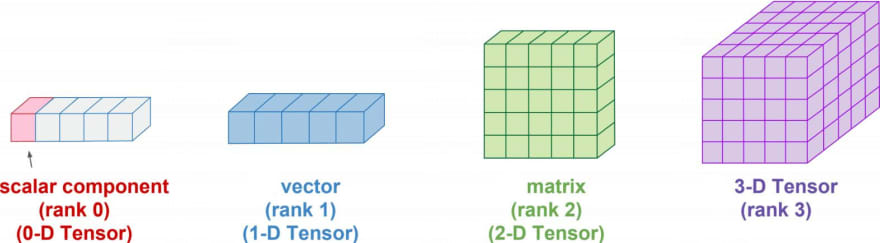

In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
V0 = np.array(1.3)
V1 = np.array([1., 2., 3.])
V2 = np.array([[1., 2.],[4., 5.]])
print(f'{V0}, {V1}, {V2}')

1.3, [1. 2. 3.], [[1. 2.]
 [4. 5.]]


In [ ]:
numpy_array = np.array([1, 2, 3])
print(type(numpy_array))

<class 'numpy.ndarray'>


In [ ]:
# Reason: Numpy uses vector broadcasting
n1 = np.array([1,2,3])
n1 + 3

array([4, 5, 6])

In [ ]:
import torch
torch.tensor?

In [ ]:
import torch
numpy_array = np.array([1, 2, 3])


t1 = torch.Tensor(numpy_array)
# It's not always possible to calculate the gradient.
# Constructor - same torch.FloatTensor
# uses a default float32 tensor, this can be changed
# all other tensors are inherited from this main Tensor Class
# always going to copy the data

t2 = torch.tensor(numpy_array)
# always prefer this!!!!
# Factory Function #design patterns - Factory design pattern ??.
# going to product a new tensor of the same type of numpy_array
# does NOT share the underlying memory with Numpy! Changing one WILL NOT change the other
# always going to copy the data (in CPU or GPU)
# torch.tensor(data, dtype=None, device=None, requires_grad=False/True)
# highly recommended to use

t3 = torch.as_tensor(numpy_array)
# Factory Function
# going to product a new tensor of the same type of numpy_array
# DOES share the underlying memory with Numpy! Changing one will change other
# CAN ACCEPT ANY PYTHON DATA STRUCTURE INCLUDING NUMPY ARRAYS
# it always tries to AVOID a copy of the data. (send data to GPU)
# we have to manually call requies_grad()
# designed for CPU

t4 = torch.from_numpy(numpy_array)
# Factory Function
# produce a new tensor with same data type
# share the underlying memory with numpy, changing one, will change other
# designed for CPU

In [ ]:
numpy_array.dtype, t1.dtype, t2.dtype, t3.dtype, t4.dtype

(dtype('int64'), torch.float32, torch.int64, torch.int64, torch.int64)

In [ ]:
numpy_array

array([1, 2, 3])

In [ ]:
print(numpy_array)
numpy_array *= 4

print(numpy_array)

[1 2 3]
[ 4  8 12]


In [ ]:
t1, t2, t3, t4

(tensor([1., 2., 3.]),
 tensor([1, 2, 3]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [ ]:
t2 *= 2
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([1., 2., 3.]),
 tensor([2, 4, 6]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [ ]:
t3 *= 2
numpy_array, t1, t2, t3, t4

(array([ 8, 16, 24]),
 tensor([1., 2., 3.]),
 tensor([1, 2, 3]),
 tensor([ 8, 16, 24]),
 tensor([ 8, 16, 24]))

In [ ]:
t4 *= 2
numpy_array, t1, t2, t3, t4

(array([16, 32, 48]),
 tensor([1., 2., 3.]),
 tensor([2, 4, 6]),
 tensor([16, 32, 48]),
 tensor([16, 32, 48]))

## PyTorch's ability to move the Tensor to CPU/GPU

In [ ]:
# pytorch -> Tensor CPU/GPU check!

device = 'CPU'
if torch.cuda.is_available():
  device = "cuda"
# if x^2 + y^2, where x and y are tensor, ITs must that both of them reside on the same machine.
#CUDA -> This is programming paradigm responsible for GPUs.

print(device)

cuda


In [ ]:
x = torch.tensor([1, 2, 3], device='cuda')
y = torch.tensor([2, 3, 4], device='cpu')
y = y.to('cuda')

print(x.device, y.device)
print(x+y)

cuda:0 cuda:0
tensor([3, 5, 7], device='cuda:0')


In [ ]:
t4, t4.dtype, t4.device

(tensor([ 8, 16, 24]), torch.int64, device(type='cpu'))

In [ ]:
t5 = t4.cuda()
# .cuda() has created a new memory on GPU with t4 values.

t5.device, t4.device

(device(type='cuda', index=0), device(type='cpu'))

In [ ]:
print(t4.device, t3.device)
t6 = t4 + t3

cpu cpu


In [ ]:
t6 = t4 + t5

RuntimeError: ignored

In [ ]:
data = torch.tensor([[1, 2, 3], [4, 5, 6]])

data[1, 0], data[0, 0:2], data[:2, :2]

(tensor(4),
 tensor([1, 2]),
 tensor([[1, 2],
         [4, 5]]))

In [ ]:
# torch.tensor?

#### Torch.tensor attributes

| Attribute | Data Type | Description |
|----|----|----|
|data|array_like | list, tuple, NumPy ndarray, scalar |
|dtype| torch.dtype | The tensor's data type|
|requires_grad | bool| Should autograd record operation |
|device | torch.device | Allocated on CPU or CUDA (GPU) |

torch.tensor(data, dtype=None, device=None, requires_grad=False) → Tensor


In [ ]:
x = 1
print(dir(x))
# x += 1
# print(x)
# x = x+1
# x = x.__add__(1)
print(x)

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']
1


In [ ]:
x = 1
dir(x)

y = x + 1
y2 = x.__add__(1)

print(y, y2, dir(x))

2 2 ['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


In [ ]:
x = torch.tensor([1., 2.], device='cuda', requires_grad=True)
# dir(x)

In [ ]:
# dir(t1)
# func and func_ : func -> returns a new object (memory), func_ -> manipulates existing memory

# t1.stride()  sometimes, so be careful with torch.func_

(1,)

In [ ]:
temp3 = torch.tensor([1,2,3])
print(temp3, id(temp3))

temp3.add(torch.tensor([2]))
print(temp3, id(temp3))

temp4 = temp3.add(torch.tensor([2]))
print(temp3, temp4, id(temp3), id(temp4))

temp3.add_(torch.tensor([2]))
print(temp3, id(temp3))

tensor([1, 2, 3]) 140148172923632
tensor([1, 2, 3]) 140148172923632
tensor([1, 2, 3]) tensor([3, 4, 5]) 140148172923632 140148048018176
tensor([3, 4, 5]) 140148172923632


False
140148047877664
False
140148047877664


In [ ]:
t = torch.as_tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu', requires_grad=False)
t

TypeError: ignored

In [ ]:
t = torch.as_tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu')
t, t.requires_grad

(tensor([1., 2., 3.]), False)

In [ ]:
t.requires_grad_()

tensor([1., 2., 3.], requires_grad=True)

In [ ]:
from torch.autograd import grad

x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

x1, x2, x3, x4

(tensor(2., dtype=torch.float16, requires_grad=True),
 tensor(3., dtype=torch.float16, requires_grad=True),
 tensor(1., dtype=torch.float16, requires_grad=True),
 tensor(4., dtype=torch.float16, requires_grad=True))

In [ ]:
z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2


print(z1.requires_grad, z2.requires_grad, f.requires_grad)


# another example!
temp1 = torch.tensor([1., 2., 3.], requires_grad=True)
temp2 = torch.tensor([1.,2., 3.], requires_grad=False)
temp3 = temp1 * temp2
# in future if temp3 is used, pytorch needs to know that temp3 was indeed created from temp1 (grad).
print(temp1.requires_grad, temp2.requires_grad, temp3.requires_grad)

True True True
True False True


In [ ]:
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2
# f = x1 * x2 + x3 * x4
# f = 2 * 3 + 1 * 4 = 10
# df_dx1 => x1 * 3 + 1 * 4 > 3
# df_dx4 => 2 * 3 + 1 * x4 > 1

df_dx = grad(outputs = f, inputs = [x1, x2, x3, x4])
print(df_dx)
print(f'gradient of x1 = {df_dx[0]}')
print(f'gradient of x2 = {df_dx[1]}')
print(f'gradient of x3 = {df_dx[2]}')
print(f'gradient of x4 = {df_dx[3]}')

(tensor(3., dtype=torch.float16), tensor(2., dtype=torch.float16), tensor(4., dtype=torch.float16), tensor(1., dtype=torch.float16))
gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 4.0
gradient of x4 = 1.0


## Session -6.
Now that we have gradients, let's use an optimizer to update the values of (X) using the calculated gradients

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

opt = optim.SGD(params = [x1, x2, x3, x4], lr=0.001)
opt.zero_grad()
# print(opt)
print(x1, x2, x3, x4)

f.backward()
opt.step()
print(x1, x2, x3,)


tensor(2., dtype=torch.float16, requires_grad=True) tensor(3., dtype=torch.float16, requires_grad=True) tensor(1., dtype=torch.float16, requires_grad=True) tensor(4., dtype=torch.float16, requires_grad=True)


RuntimeError: ignored

In [ ]:

# inputs
# x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
# x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
# x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
# x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# NN network
z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2 # output

#  two ways to compute gradients!
print(x1, x2, x3, x4)
# df_dx = grad(outputs = f, inputs = [x1, x2, x3, x4])
# print(df_dx)
# print(f'gradient of x1 = {df_dx[0]}')
# print(f'gradient of x2 = {df_dx[1]}')
# print(f'gradient of x3 = {df_dx[2]}')
# print(f'gradient of x4 = {df_dx[3]}')

# opt.zero_grad()
f.backward()

print(f'gradient of x1 = {x1.grad}')
print(f'gradient of x2 = {x2.grad}')
print(f'gradient of x3 = {x3.grad}')
print(f'gradient of x4 = {x4.grad}')

opt.step() # It takes a single step SGD optimizer, with lr = 0.001 eg: x1 = x1 - lr*x1.grad
#  x1: 2-0.001 * 3 = 2 - 0.003
# print(x1, x2, x3, x4)

tensor(2., dtype=torch.float16, requires_grad=True) tensor(3., dtype=torch.float16, requires_grad=True) tensor(1., dtype=torch.float16, requires_grad=True) tensor(4., dtype=torch.float16, requires_grad=True)
gradient of x1 = 12.0
gradient of x2 = 8.0
gradient of x3 = 16.0
gradient of x4 = 4.0


## Sample Network (after fixing the issues)

In [ ]:
# inputs
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# NN network
# z1 = x1 * x2
# z2 = x3 * x4

# f = z1 + z2

def my_network(x1, x2, x3, x4):
  return x1*x3 + x2*x4

# optimizer= optim.SGD(params=my_network.parameters(), lr=0.001)
opt2 = optim.SGD(params = [x1, x2, x3, x4], lr=0.001)
epoch = 2



# graph was created!!

print(x1, x2, x3, x4)
for i in range(10):
  f = my_network(x1, x2, x3, x4) # forward pass the network
  opt2.zero_grad() #clears the previous gradients accumulated.

  f.backward() #now computes the new gradients for this epoch.
  opt2.step() # now takes the step lr =0.001 with new grads

  print(x1, x2, x3, x4)

tensor(2., dtype=torch.float16, requires_grad=True) tensor(3., dtype=torch.float16, requires_grad=True) tensor(1., dtype=torch.float16, requires_grad=True) tensor(4., dtype=torch.float16, requires_grad=True)
tensor(1.9990, dtype=torch.float16, requires_grad=True) tensor(2.9961, dtype=torch.float16, requires_grad=True) tensor(0.9980, dtype=torch.float16, requires_grad=True) tensor(3.9961, dtype=torch.float16, requires_grad=True)
tensor(1.9980, dtype=torch.float16, requires_grad=True) tensor(2.9922, dtype=torch.float16, requires_grad=True) tensor(0.9961, dtype=torch.float16, requires_grad=True) tensor(3.9922, dtype=torch.float16, requires_grad=True)
tensor(1.9971, dtype=torch.float16, requires_grad=True) tensor(2.9883, dtype=torch.float16, requires_grad=True) tensor(0.9941, dtype=torch.float16, requires_grad=True) tensor(3.9883, dtype=torch.float16, requires_grad=True)
tensor(1.9961, dtype=torch.float16, requires_grad=True) tensor(2.9844, dtype=torch.float16, requires_grad=True) tensor(0

In [ ]:
t = torch.tensor([
    [0, 0, 0, 0],
    [1, 2, 3, 4],
    [2, 2, 2, 2]
], dtype=torch.float32)

In [ ]:
t.shape, t.size(), len(t.shape)

(torch.Size([3, 4]), torch.Size([3, 4]), 2)

In [ ]:
torch.tensor(t.shape).prod()

tensor(12)

In [ ]:
t.numel()

12

In [ ]:
t.reshape(1, 12)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])

In [ ]:
t.reshape(-1, 6)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [ ]:
t.reshape(2, -1)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [ ]:
t.reshape(2, 2, -1)

tensor([[[0., 0., 0.],
         [0., 1., 2.]],

        [[3., 4., 2.],
         [2., 2., 2.]]])

In [ ]:
t.reshape(4, 3)

tensor([[0., 0., 0.],
        [0., 1., 2.],
        [3., 4., 2.],
        [2., 2., 2.]])

In [ ]:
print(t.reshape(-1, 12))
print(t.reshape(-1, 12).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [ ]:
print(t.reshape(1, 12).squeeze())
print(t.reshape(1, 12).squeeze().shape)

tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.])
torch.Size([12])


In [ ]:
print(t.reshape(1, 12).squeeze().unsqueeze(dim = 0))
print(t.reshape(1, 12).squeeze().unsqueeze(dim = 0).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [ ]:
def flatter(t):
  t = t.reshape(1, -1)
  t = t.squeeze()
  return t

t.shape

torch.Size([3, 4])

In [ ]:
t_flatter = flatter(t)
t_flatter.shape, t_flatter

(torch.Size([12]), tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]))

In [ ]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])

t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [ ]:
t.reshape(4, 3)
t.squeeze(dim=1), t

(tensor([[0., 0., 0., 0.],
         [1., 2., 3., 4.],
         [2., 2., 2., 2.]]),
 tensor([[0., 0., 0., 0.],
         [1., 2., 3., 4.],
         [2., 2., 2., 2.]]))

In [ ]:
img1 = torch.tensor([
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1]
])

img2 = torch.tensor([
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2]
])

img3 = torch.tensor([
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3]
])

In [ ]:
batch = torch.stack((img1, img2, img3))
batch.shape

torch.Size([3, 4, 4])

In [ ]:
batch = batch.reshape(3, 1, 4, 4)
batch

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [ ]:
batch[0]

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [ ]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
], dtype=torch.float32)

t2 = torch.tensor([
    [5, 6],
    [7, 8]
], dtype=torch.float32)

In [ ]:
t1 + t2

tensor([[ 6.,  8.],
        [10., 12.]])

In [ ]:
t1 - t2

tensor([[-4., -4.],
        [-4., -4.]])

In [ ]:
t1 + 2

tensor([[3., 4.],
        [5., 6.]])

In [ ]:
print(t1.add(2))

print(t1.sub(2))

print(t1.mul(2))

print(t1.div(2))

tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [ ]:
t = torch.tensor([
    [0, 5, 7],
    [6, 0, 7],
    [0, 8, 0]
], dtype=torch.float32)

In [ ]:
t.eq(0)

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [ ]:
t.ge(0)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
t.le(7)

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True]])

In [ ]:
dir(t)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed_

In [ ]:
t = torch.tensor([
  [1, 1, 1, 1],
  [2, 2, 2, 2],
  [3, 3, 3, 3],
  [4, 4, 4, 4]
])

In [ ]:
t.sum(dim=0)

tensor([10, 10, 10, 10])

In [ ]:
t.sum(dim=1)

tensor([ 4,  8, 12, 16])

In [ ]:
t.argmax(), t.max()

(tensor(12), tensor(4))

In [ ]:
t.argmin(), t.min()

(tensor(0), tensor(1))

In [ ]:
t.flatten()

tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

## PyTorch Main NN|

# PyTorch Main

# Working with the dataset

We will look at convolutional/image examples as they allow us to get a good intuition on axises and are more complex to work on just 1D data

### A common nn pipeline looks like this:
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the model

In [ ]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [ ]:
from torch.utils.data import Dataset

class Animals(Dataset):
  def __init__(self, csv_file):
    self.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label, image = r
    return label, image

  def __len__(self):
    return len(self.data)

In [ ]:
# now let's work with FashionMnist

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)


NameError: ignored

In [ ]:
x = iter(range(11))
next(x)

0

In [ ]:
next(x)

1

In [ ]:
next(x)

2

In [ ]:
next(x), next(x), next(x), next(x), next(x), next(x)

(3, 4, 5, 6, 7, 8)

In [ ]:
next(x), next(x)

(9, 10)

In [ ]:
next(x)

StopIteration: ignored

In [ ]:
next(iter(train_set))[0], next(iter(train_set))[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
i = 0

for j in train_set:
  print(j[1])
  i+= 1
  if i > 5:
    break

9
0
0
3
0
2


In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 32,
    shuffle = True
)

In [ ]:
next(iter(train_loader))[1]

tensor([2, 1, 8, 3, 6, 7, 0, 2, 4, 4, 8, 8, 8, 2, 2, 5, 3, 3, 1, 5, 6, 1, 5, 6,
        5, 9, 0, 2, 9, 6, 1, 0])

In [ ]:
next(iter(train_loader))[1]

tensor([4, 7, 1, 4, 1, 7, 7, 9, 1, 2, 0, 4, 3, 5, 2, 5, 0, 8, 2, 2, 7, 8, 7, 3,
        0, 2, 2, 8, 7, 4, 5, 9])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_set.train_labels.bincount() #frequency of each label, we have balanced class here

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
sample = next(iter(train_set))

len(sample)

2

In [ ]:
image, label = sample

label: 9


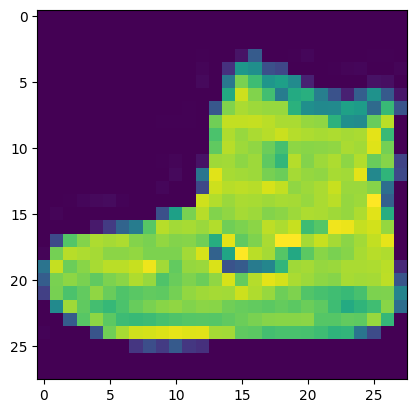

In [ ]:
plt.imshow(image.squeeze())
print('label:', label)

In [ ]:
batch = next(iter(train_loader))
len(batch), type(batch)

(2, list)

In [ ]:
images, labels = batch

In [ ]:
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([1, 4, 4, 5, 1, 5, 6, 8, 6, 9, 8, 3, 0, 2, 3, 6, 1, 0, 7, 4, 8, 2, 0, 9, 9, 1, 6, 6, 7, 0, 8, 3])


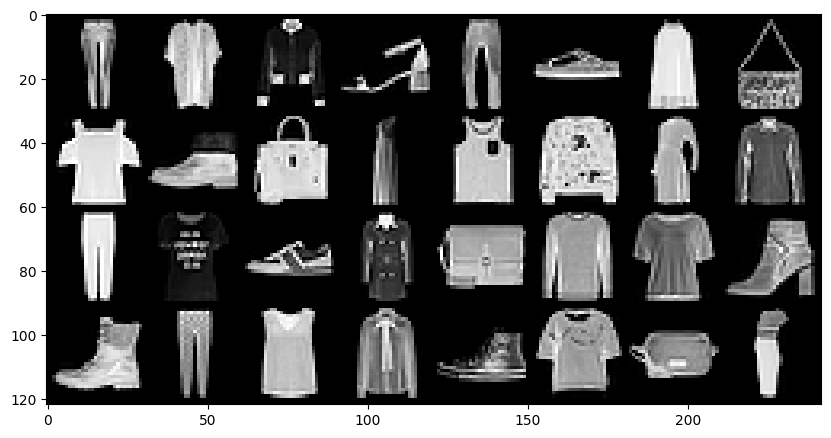

In [ ]:
grid = torchvision.utils.make_grid(images,  nrow=8)
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [ ]:
import torch.nn as nn

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [ ]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [ ]:
from torch.utils.data import Dataset

# Dataset is there to be able to interact with DataLoader

class MyDataset(Dataset):
  def __init__(self):
    self.data = (
        "This was an amazing product",
        "This was the shittiest product possible",
        "Amazing product, fast delivery",
        "Had to sell my kidney to buy this, and now my life has changed",
        "Good one!",
        "Bad One!"
    )

  def __getitem__(self, index):
    return self.data[index]

  def __len__(self):
    return len(self.data)

myData = MyDataset()

for m in myData:
  print(m)



This was an amazing product
This was the shittiest product possible
Amazing product, fast delivery
Had to sell my kidney to buy this, and now my life has changed
Good one!
Bad One!


In [ ]:
train_loader = torch.utils.data.DataLoader(myData, batch_size = 2, shuffle=True)

In [ ]:
for tr in train_loader:
  print(tr)

['This was an amazing product', 'This was the shittiest product possible']
['Amazing product, fast delivery', 'Bad One!']
['Had to sell my kidney to buy this, and now my life has changed', 'Good one!']


In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform = transforms.Compose([
          transforms.ToTensor()
    ])
)

In [ ]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # input 28 # output 24 # receptive_field = 5
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    # input 24 # output 20 # receptive_field = 9
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    # input 12x20x20, output 120
    # input 10*512
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    return t


In [ ]:
network = Network()

print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [ ]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [ ]:
dir(network.fc2)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook

In [ ]:
network.fc2.weight

Parameter containing:
tensor([[-0.0343,  0.0602,  0.0605,  ...,  0.0449, -0.0012,  0.0529],
        [-0.0509, -0.0603, -0.0717,  ..., -0.0177, -0.0491, -0.0084],
        [-0.0865, -0.0859,  0.0279,  ..., -0.0383,  0.0127, -0.0653],
        ...,
        [-0.0065,  0.0194, -0.0759,  ...,  0.0041,  0.0141, -0.0268],
        [ 0.0747,  0.0691, -0.0081,  ..., -0.0540,  0.0772,  0.0587],
        [-0.0149, -0.0754,  0.0211,  ..., -0.0140, -0.0741, -0.0439]], requires_grad=True)

In [ ]:
network.fc2.weight.shape

torch.Size([60, 120])

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    # TODO implement this
    return t

network = Network()

for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 4800])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [5]:
import torch.nn.functional as F
import torch
import torch.nn as nn

In [6]:

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # 28x28
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    # input layer
    x = t

    # conv1 layer
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12

    # conv2 layer
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4

    # reshapre
    x = x.reshape(-1, 12 * 4 * 4)

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # output layer
    x = self.out(x)
    # x = F.softmax(x, dim=1)
    return x

In [ ]:
torch.set_grad_enabled(False)

In [ ]:
sample = next(iter(train_set))
image, label = sample
image.shape, image.shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

In [ ]:
network = Network()

In [ ]:
pred = network(image)

In [ ]:
pred, pred.shape, label

(tensor([[ 0.0914,  0.1124,  0.0621,  0.0720,  0.0662, -0.0895,  0.0004,  0.0064,  0.0996, -0.0736]]),
 torch.Size([1, 10]),
 9)

In [ ]:
pred.argmax(dim=1)

tensor([1])

In [ ]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)

In [ ]:
F.softmax(pred, dim=1)

tensor([[0.1056, 0.1078, 0.1025, 0.1036, 0.1030, 0.0881, 0.0964, 0.0970, 0.1065, 0.0895]])

In [ ]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10
)

In [ ]:
batch = next(iter(data_loader))
len(batch[0])

10

In [ ]:
images, labels = batch

preds = network(images)
preds.shape

torch.Size([10, 10])

In [ ]:
preds

tensor([[ 0.0914,  0.1124,  0.0621,  0.0720,  0.0662, -0.0895,  0.0004,  0.0064,  0.0996, -0.0736],
        [ 0.0807,  0.1114,  0.0588,  0.0839,  0.0632, -0.0962, -0.0026,  0.0058,  0.1060, -0.0687],
        [ 0.0813,  0.1107,  0.0626,  0.0759,  0.0661, -0.1033,  0.0040,  0.0034,  0.1066, -0.0607],
        [ 0.0834,  0.1123,  0.0599,  0.0752,  0.0643, -0.1017,  0.0012,  0.0073,  0.1051, -0.0643],
        [ 0.0851,  0.1100,  0.0596,  0.0813,  0.0568, -0.1044, -0.0044,  0.0127,  0.1078, -0.0677],
        [ 0.0811,  0.1085,  0.0554,  0.0785,  0.0620, -0.0944, -0.0085,  0.0139,  0.1089, -0.0668],
        [ 0.0940,  0.1171,  0.0591,  0.0690,  0.0664, -0.0934, -0.0005,  0.0076,  0.0993, -0.0694],
        [ 0.0870,  0.1105,  0.0586,  0.0686,  0.0655, -0.0900,  0.0058,  0.0115,  0.1012, -0.0801],
        [ 0.0850,  0.1119,  0.0638,  0.0721,  0.0727, -0.0960, -0.0003,  0.0089,  0.0981, -0.0677],
        [ 0.0880,  0.1149,  0.0628,  0.0687,  0.0722, -0.0912, -0.0077,  0.0043,  0.0965, -0.0686]])

In [ ]:
preds.argmax(dim=1)

tensor([1, 1, 1, 1, 1, 8, 1, 1, 1, 1])

In [ ]:
preds.argmax(dim=1).eq(labels).sum().item()

0

In [ ]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
get_num_correct(preds, labels)

0

In [ ]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.320847511291504

In [ ]:
print(network.conv1.weight.grad)

None


In [ ]:
loss.backward()

In [ ]:
print(network.conv1.weight.grad)

tensor([[[[-4.1315e-05,  7.1568e-05,  2.5473e-04,  2.5983e-04,  4.7365e-05],
          [ 1.2927e-05, -1.2589e-05,  2.2073e-06, -4.8794e-06, -2.1108e-05],
          [ 1.0771e-04,  1.8845e-04, -1.2659e-05, -2.4411e-04, -4.3682e-05],
          [ 1.0312e-05, -4.8621e-05, -2.9178e-05, -1.5741e-04, -6.9876e-05],
          [ 9.7474e-05, -3.7544e-04, -6.2332e-04, -1.4960e-04, -3.2057e-04]]],


        [[[ 4.2686e-05,  8.1689e-05,  1.3480e-04, -1.9069e-04, -4.5291e-04],
          [-6.3117e-05, -8.7447e-05,  1.7811e-04, -9.8509e-06, -1.2277e-03],
          [-9.8301e-05,  2.9347e-04,  6.1182e-04, -7.0742e-04, -1.0142e-03],
          [ 4.5899e-05,  5.6094e-04, -5.1326e-04, -5.6511e-04, -3.5898e-04],
          [ 4.9249e-04,  1.1122e-04, -1.0992e-03, -3.6295e-04,  1.3974e-04]]],


        [[[ 2.8364e-03,  2.3402e-03,  2.6597e-03,  3.7306e-03,  3.3751e-03],
          [ 3.6011e-03,  2.3311e-03,  1.5809e-03,  1.4480e-03,  1.4725e-03],
          [ 3.2337e-03,  1.8008e-03,  3.9708e-03,  3.9865e-03,  3.34

In [ ]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [ ]:
optimizer = optim.SGD(network.parameters(), lr = 0.01)

In [ ]:
loss.item(), get_num_correct(preds, labels)

(2.320847511291504, 0)

In [ ]:
optimizer.step()

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.3192076683044434, 0)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.3159430027008057, 0)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.311093807220459, 1)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.3046939373016357, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.296828269958496, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.287583351135254, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2770824432373047, 3)

In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss
# Gradients keep accumulating, so you should make them zero before moving to next epoch!
optimizer.zero_grad() # clear the previous gradients.
loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.292600393295288
loss2: 2.251415729522705


In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0,
    "total_correct:", total_correct,
    "loss:", total_loss
)

epoch: 0 total_correct: 47199 loss: 338.2010314166546


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch,
        "total_correct:", total_correct,
        "loss:", total_loss
    )

epoch 0 total_correct: 51333 loss: 236.3329640328884
epoch 1 total_correct: 51888 loss: 216.67925652861595
epoch 2 total_correct: 52346 loss: 205.68030796945095
epoch 3 total_correct: 52394 loss: 203.35893324017525
epoch 4 total_correct: 52827 loss: 195.4632730782032
epoch 5 total_correct: 52713 loss: 195.51717445254326
epoch 6 total_correct: 53025 loss: 189.4264089539647
epoch 7 total_correct: 52953 loss: 190.26087544858456
epoch 8 total_correct: 53279 loss: 182.52321477234364
epoch 9 total_correct: 53189 loss: 183.99722892045975


## Numpy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In [ ]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

In [ ]:
ed as we run the algorithm.

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

In [ ]:
train(X, y, epochs, learnrate, True)